## Analysis of Nitrate conc in Veg

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
# warnings.simplefilter(action='ignore', category="FutureWarning")
# warnings.simplefilter(action='ignore', category="DeprecationWarning")
%matplotlib inline

# sys.path.append(os.path.abspath("/home/laklevi1/anarh/Seminarcode/"))
# from petrology_util_funcs import *

from subprocess import check_output
%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas    : 1.4.3
seaborn   : 0.11.1
numpy     : 1.21.5
matplotlib: 3.5.2



In [40]:
ptdir = "./"
print(check_output(["ls", "{}".format(ptdir)]).decode("utf8"))

DOC-20230729-WA0000.xlsx
Joyce_project.ipynb
OVERALL.xlsx
Sharon_polygon-Copy1.ipynb
archive
baised.pdf
baised.png
loan_default_Edit_0.ipynb
loan_default_Edit_1.ipynb
pipeline.html
unbaised.pdf
unbaised.png
veg_missing_data_.png
visualizing_missing_data_.png
visualizing_missing_data_with_barplot_Seaborn_distplot.png



In [41]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [42]:
!pwd

/home/laklevi1/anarh/Loan Defualt PhD Project


In [43]:
flDir = "/home/laklevi1/anarh/Loan Defualt PhD Project/"

In [44]:
# xl = pd.ExcelFile(flDir + 'DOC-20230729-WA0000.xlsx')
xl = pd.ExcelFile(flDir + 'OVERALL.xlsx')
xl.sheet_names

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']

* load sheet 2

In [45]:
# df=xl.parse(sheet_name='Sheet2', skiprows=None)
df=xl.parse(sheet_name='Sheet4', skiprows=None)
df.head(n = 10)

,GPS CODE,GPS CODE.1,SAMPLE CODE,RAW NO3_CONC (mg/kg),FRIED NO3_CONC (mg/kg),COOKED NO3_CONC(mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),VEGETABLES,VEG. TYPE,...,Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,6.11,1.18,KS-01-001,484.70,601.00,456.10,1.81,3.74,Cabbage,Leafy,...,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
1,6.11,1.18,KS-01-002,514.00,611.60,449.70,1.81,3.74,Cabbage,Leafy,...,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
2,6.11,1.18,KS-01-003,452.60,561.20,400.50,1.81,3.74,Cabbage,Leafy,...,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
3,6.11,1.17,KS-02-001,612.70,746.60,541.80,2.01,5.11,Lettuce,Leafy,...,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
4,6.11,1.17,KS-02-001,464.40,547.50,426.90,2.01,5.11,Lettuce,Leafy,...,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
5,6.11,1.17,KS-02-002,485.10,616.00,414.30,2.01,5.11,Lettuce,Leafy,...,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
6,6.11,1.17,KS-02-003,538.00,640.20,437.40,2.01,5.11,Lettuce,Leafy,...,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
7,6.11,1.17,KS-03-001,296.60,372.90,236.60,3.65,2.23,Beetroot,Root,...,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
8,6.11,1.17,KS-03-002,184.50,239.20,236.60,3.65,2.23,Beetroot,Root,...,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
9,6.11,1.17,KS-03-003,217.40,251.70,236.60,3.65,2.23,Beetroot,Root,...,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0


In [46]:
def visMissData(df_):
    plt.figure(figsize=(10,6))
    sns.displot(
        data=df_.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.savefig("veg_missing_data_.png", dpi=200)

<Figure size 720x432 with 0 Axes>

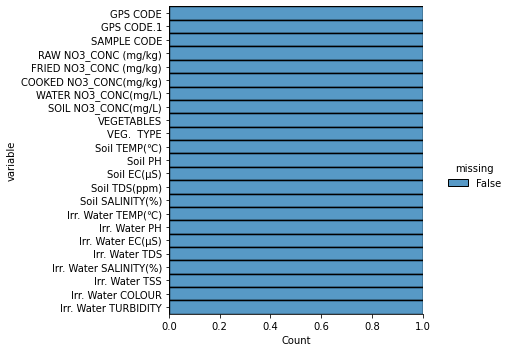

In [47]:
visMissData(df_=df)

In [48]:
df.columns

Index(['GPS CODE', 'GPS CODE.1', 'SAMPLE CODE', 'RAW NO3_CONC (mg/kg)',
       'FRIED NO3_CONC (mg/kg)', 'COOKED NO3_CONC(mg/kg)',
       'WATER NO3_CONC(mg/L)', 'SOIL NO3_CONC(mg/L)', 'VEGETABLES',
       'VEG.  TYPE', 'Soil TEMP(℃)', 'Soil PH', 'Soil EC(µS)', 'Soil TDS(ppm)',
       'Soil SALINITY(%)', 'Irr. Water TEMP(℃)', 'Irr. Water PH',
       'Irr. Water EC(µS)', 'Irr. Water TDS', 'Irr. Water SALINITY(%)',
       'Irr. Water TSS', 'Irr. Water COLOUR', 'Irr. Water TURBIDITY'],
      dtype='object')

In [50]:
df_ = df.drop(['GPS CODE', 
         'GPS CODE.1',
         'SAMPLE CODE',    
        ], axis=1)

df_.head(n=10)

,RAW NO3_CONC (mg/kg),FRIED NO3_CONC (mg/kg),COOKED NO3_CONC(mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),VEGETABLES,VEG. TYPE,Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,484.70,601.00,456.10,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
1,514.00,611.60,449.70,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
2,452.60,561.20,400.50,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
3,612.70,746.60,541.80,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
4,464.40,547.50,426.90,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
5,485.10,616.00,414.30,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
6,538.00,640.20,437.40,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
7,296.60,372.90,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
8,184.50,239.20,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
9,217.40,251.70,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0


In [51]:
df_.rename(columns={'RAW NO3_CONC (mg/kg)':"Fresh Veg NO3_CONC (mg/kg)"}, inplace=True)
df_.rename(columns={'FRIED NO3_CONC (mg/kg)':"Fried Veg NO3_CONC (mg/kg)"}, inplace=True)
df_.rename(columns={'COOKED NO3_CONC(mg/kg)':"Cooked Veg NO3_CONC (mg/kg)"}, inplace=True)
df_.rename(columns={'VEGETABLES':"VEG"}, inplace=True)
df_.head(n=10)

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),VEG,VEG. TYPE,Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,484.70,601.00,456.10,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
1,514.00,611.60,449.70,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
2,452.60,561.20,400.50,1.81,3.74,Cabbage,Leafy,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
3,612.70,746.60,541.80,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
4,464.40,547.50,426.90,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
5,485.10,616.00,414.30,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
6,538.00,640.20,437.40,2.01,5.11,Lettuce,Leafy,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
7,296.60,372.90,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
8,184.50,239.20,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
9,217.40,251.70,236.60,3.65,2.23,Beetroot,Root,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0


In [18]:
df_.shape

(36, 7)

In [52]:
cat_features = df_.select_dtypes(exclude=[np.number])
num_features = df_.select_dtypes(include=[np.number])

In [53]:
num_features.head(n=10)

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,484.70,601.00,456.10,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
1,514.00,611.60,449.70,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
2,452.60,561.20,400.50,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
3,612.70,746.60,541.80,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
4,464.40,547.50,426.90,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
5,485.10,616.00,414.30,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
6,538.00,640.20,437.40,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
7,296.60,372.90,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
8,184.50,239.20,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0
9,217.40,251.70,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0


In [34]:
num_features.describe()

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L)
count,36.00,36.00,36.00,36.00,36.00
mean,372.71,460.00,280.03,2.72,4.24
std,194.74,242.69,85.96,0.72,2.93
min,79.00,102.70,236.60,1.76,1.94
25%,250.40,312.43,236.60,2.13,2.87
50%,344.30,423.15,236.60,2.64,3.74
75%,457.35,550.92,244.88,3.46,4.24
max,973.20,1216.30,541.80,3.83,13.28


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

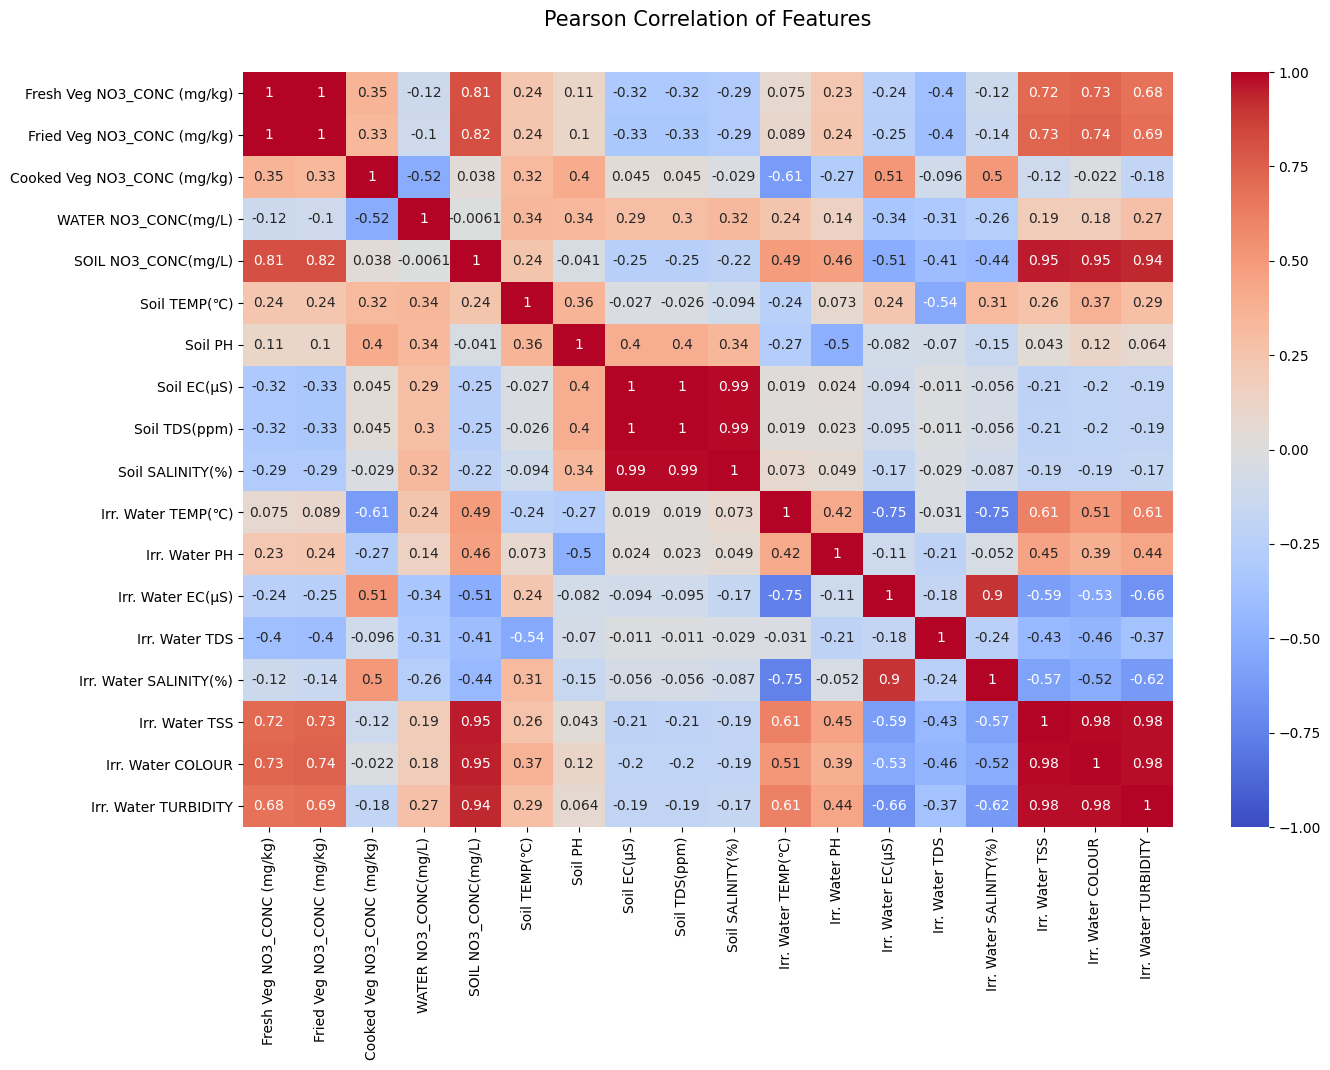

In [55]:
# Correlation Matrix
plt.figure(figsize = (15,10), dpi = 100)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(num_features.corr(), 
            annot = True, 
            cmap = 'coolwarm', vmin = -1, vmax = 1)

In [57]:
cat_features.columns

Index(['VEG', 'VEG.  TYPE'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Cabbage'),
  Text(1, 0, 'Lettuce'),
  Text(2, 0, 'Beetroot'),
  Text(3, 0, 'Gboma'),
  Text(4, 0, 'Sweet pepper'),
  Text(5, 0, 'Sweet peppper'),
  Text(6, 0, 'Sweet pepper '),
  Text(7, 0, 'Chilly pepper'),
  Text(8, 0, 'Carrot'),
  Text(9, 0, 'Spring onion'),
  Text(10, 0, 'Shallot')])

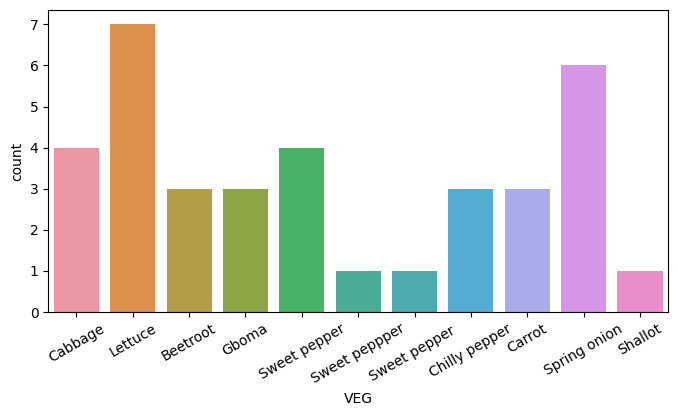

In [58]:
# check the balance of the outcome feature
plt.figure(figsize = (8,4), dpi = 100)
sns.countplot(data = cat_features, x = 'VEG')
plt.xticks(rotation=30)

In [67]:
"""Remember to run the Latex code !!!"""
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return r'${p:.1f}\% ({v:d})$'.format(p=pct,v=val)
    return my_autopct

In [68]:
import matplotlib._color_data as mcd
import random

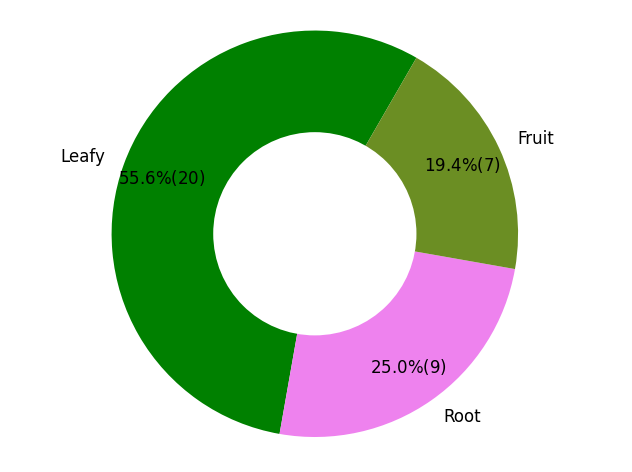

In [70]:
data = cat_features.copy()
labels = ['Leafy', 'Root', "Fruit"] 
sizes = [data["VEG.  TYPE"].value_counts()[0],
         data["VEG.  TYPE"].value_counts()[1],
         data["VEG.  TYPE"].value_counts()[2]] 
#colors
# colors = ['#f19911',
#           '#99ff99',]
#           '#99ff99',#66b3ff
#           '#ffcc99',
#           '#f19911', 
#           '#fcee00',#ff9c99
#           '#b26b6b']
topN = len(labels)
colors = random.sample(population=list(mcd.CSS4_COLORS.keys()), k=topN)
 
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=80)


patches, texts, autotexts = ax1.pie(sizes,
                                    labels=labels,
                                    autopct=make_autopct(values=sizes),
                                    startangle=60, 
                                    pctdistance=0.80, 
                                    colors = colors,
                                    textprops={'fontsize': 15})  # shadow=True,
for k in range(len(labels)):
        texts[k].set_fontsize(15)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('vegbaised.pdf', dpi = 200)
plt.savefig('vegbaised.png', dpi = 200)

In [71]:
list(num_features.columns)

['Fresh Veg NO3_CONC (mg/kg)',
 'Fried Veg NO3_CONC (mg/kg)',
 'Cooked Veg NO3_CONC (mg/kg)',
 'WATER NO3_CONC(mg/L)',
 'SOIL NO3_CONC(mg/L)',
 'Soil TEMP(℃)',
 'Soil PH',
 'Soil EC(µS)',
 'Soil TDS(ppm)',
 'Soil SALINITY(%)',
 'Irr. Water TEMP(℃)',
 'Irr. Water PH',
 'Irr. Water EC(µS)',
 'Irr. Water TDS',
 'Irr. Water SALINITY(%)',
 'Irr. Water TSS',
 'Irr. Water COLOUR',
 'Irr. Water TURBIDITY']

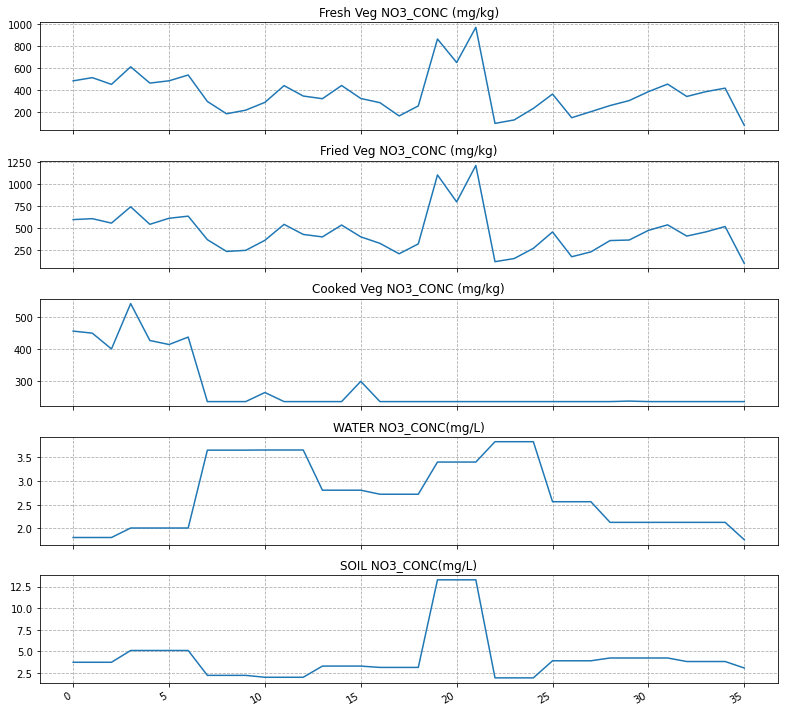

In [38]:
fig, axes = plt.subplots(5, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(list(num_features.columns), axes):
# sns.boxplot(data=df_fl, x='Month', y=name, ax=ax)
    ax.plot(num_features['{}'.format(name)])
#     ax.set_ylabel('{}'.format(name))
    ax.set_title(name)
    ax.grid(True, linestyle='--')
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
    else:
        for label in ax.get_xmajorticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment("right")
fig.tight_layout()

In [101]:
# !pip install factor_analyzer

In [76]:
num_features.head()

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,484.70,601.00,456.10,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
1,514.00,611.60,449.70,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
2,452.60,561.20,400.50,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0
3,612.70,746.60,541.80,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0
4,464.40,547.50,426.90,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0


In [81]:
data = num_features.replace(0, 0.01)
data.head(n=36)

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY
0,484.70,601.00,456.10,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0.01,36.00,0.01
1,514.00,611.60,449.70,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0.01,36.00,0.01
2,452.60,561.20,400.50,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0.01,36.00,0.01
3,612.70,746.60,541.80,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2.00,48.00,0.01
4,464.40,547.50,426.90,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2.00,48.00,0.01
5,485.10,616.00,414.30,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2.00,48.00,0.01
6,538.00,640.20,437.40,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2.00,48.00,0.01
7,296.60,372.90,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0.01,24.00,0.01
8,184.50,239.20,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0.01,24.00,0.01
9,217.40,251.70,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0.01,24.00,0.01


**Bartlett’s test** of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [82]:
# from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value


(3122.9571474771083, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

**Kaiser-Meyer-Olkin (KMO) Test** measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [84]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_all,kmo_model

(array([0.61608596, 0.5655327 , 0.81688799, 0.10327595, 0.32141047,
        0.41226536, 0.09755707, 0.20791336, 0.20496464, 0.17706494,
        0.35640647, 0.11043195, 0.2238296 , 0.17638632, 0.23445321,
        0.32194647, 0.31423295, 0.32108217]),
 0.26427819492443266)

In [85]:
data.columns

Index(['Fresh Veg NO3_CONC (mg/kg)', 'Fried Veg NO3_CONC (mg/kg)',
       'Cooked Veg NO3_CONC (mg/kg)', 'WATER NO3_CONC(mg/L)',
       'SOIL NO3_CONC(mg/L)', 'Soil TEMP(℃)', 'Soil PH', 'Soil EC(µS)',
       'Soil TDS(ppm)', 'Soil SALINITY(%)', 'Irr. Water TEMP(℃)',
       'Irr. Water PH', 'Irr. Water EC(µS)', 'Irr. Water TDS',
       'Irr. Water SALINITY(%)', 'Irr. Water TSS', 'Irr. Water COLOUR',
       'Irr. Water TURBIDITY'],
      dtype='object')

<AxesSubplot:xlabel='Irr. Water PH'>

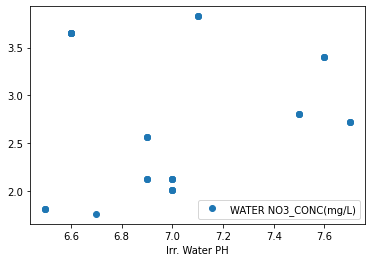

In [87]:
data.plot(x='Irr. Water PH', y='WATER NO3_CONC(mg/L)', style='o')

In [88]:
"""
Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance.
Only numerical features should be inputted with categorical features untouched

"""
try:
    from imblearn.over_sampling import SMOTE
except:
    from imblearn.over_sampling import SMOTE

In [92]:
cat_features

,VEG,VEG. TYPE
0,Cabbage,Leafy
1,Cabbage,Leafy
2,Cabbage,Leafy
3,Lettuce,Leafy
4,Lettuce,Leafy
5,Lettuce,Leafy
6,Lettuce,Leafy
7,Beetroot,Root
8,Beetroot,Root
9,Beetroot,Root


In [95]:
cat_features.columns

Index(['VEG', 'VEG.  TYPE'], dtype='object')

In [96]:
# Assigning categorical variables to a numerical value
cat_maps = {'VEG.  TYPE': {'Fruit': 0, 'Leafy': 1, 'Root': 2}
           }
            
          
cdt = cat_features.copy()
cdt['VEG.  TYPE'] = cdt['VEG.  TYPE'].map(cat_maps['VEG.  TYPE'])
cdt.head()

,VEG,VEG. TYPE
0,Cabbage,1
1,Cabbage,1
2,Cabbage,1
3,Lettuce,1
4,Lettuce,1


In [97]:
cdt['VEG.  TYPE'].value_counts()

1    20
0     9
2     7
Name: VEG.  TYPE, dtype: int64

In [100]:
# Class count
count_class_1, count_class_0, count_class_2= cdt['VEG.  TYPE'].value_counts()
count_class_1, count_class_0, count_class_2

(20, 9, 7)

In [102]:
ndt = num_features.copy()
ndt['target'] = cdt['VEG.  TYPE']
# Divide by class
df_class_0 = ndt[ndt['target'] == 0]
df_class_1 = ndt[ndt['target'] == 1]
df_class_2 = ndt[ndt['target'] == 2]

In [169]:
ndt

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY,target
0,484.70,601.00,456.10,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0,1
1,514.00,611.60,449.70,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0,1
2,452.60,561.20,400.50,1.81,3.74,29.80,7.20,78.05,39.20,0.10,28.30,6.50,1897.00,947.70,3.50,0,36,0,1
3,612.70,746.60,541.80,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0,1
4,464.40,547.50,426.90,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0,1
5,485.10,616.00,414.30,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0,1
6,538.00,640.20,437.40,2.01,5.11,29.80,7.10,117.60,58.89,0.20,28.70,7.00,2706.00,131.80,4.90,2,48,0,1
7,296.60,372.90,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0,2
8,184.50,239.20,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0,2
9,217.40,251.70,236.60,3.65,2.23,29.90,6.80,60.99,30.45,0.10,28.80,6.60,2147.00,107.50,4.00,0,24,0,2


In [104]:
# df_class_0

### Random over-sampling

Random over-sampling:
0    50
1    50
2    50
Name: target, dtype: int64


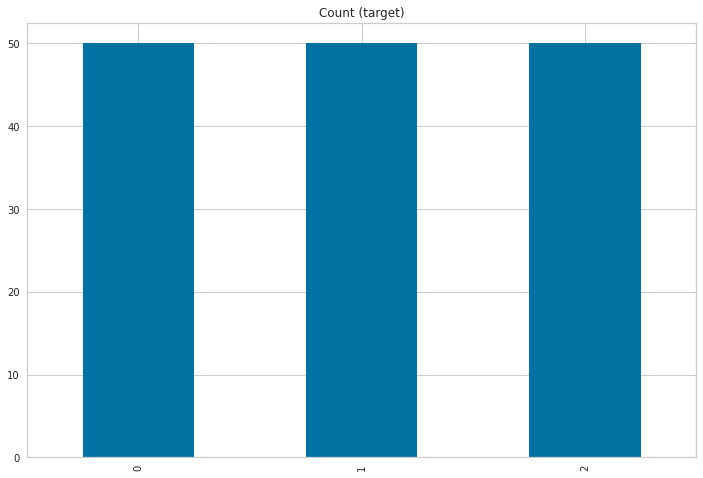

In [127]:
Ncnt = 50
df_class_0_over = df_class_0.sample(Ncnt, replace=True)
df_class_1_over = df_class_1.sample(Ncnt, replace=True)
df_class_2_over = df_class_2.sample(Ncnt, replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over = pd.concat([df_class_0_over, df_class_1_over, df_class_2_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');


In [128]:
df_test_over.shape

(150, 19)

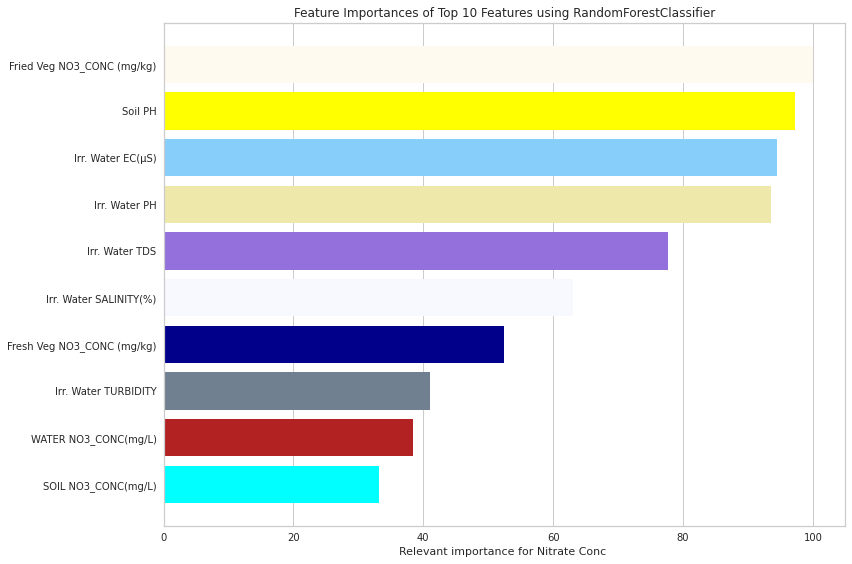

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='Relevant importance for Nitrate Conc '>

In [129]:
X_df = df_test_over.drop('target', axis=1)
y_df = df_test_over['target']

import random
from sklearn.ensemble import RandomForestClassifier as rfC
from yellowbrick.model_selection import FeatureImportances
plt.rcParams.update({
   'figure.figsize': (12.0, 8.0)
    })

c ='Nitrate Conc '
topN = 10
# val = randint(0, topN)

import matplotlib._color_data as mcd

# Show the feature selection
model = rfC(n_estimators=10, random_state=16)

viz = FeatureImportances(model,
                         xlabel='Relevant importance for {}'.format(c),
                        topn=topN,
                        stack=False,
#                          size=[15,10],
                        colors=random.sample(population=list(mcd.CSS4_COLORS.keys()), k=topN))
viz.fit(X_df, y_df)
viz.show()

In [131]:
viz.feature_importances_

array([ 33.14576847,  38.40232903,  41.01415685,  52.4821941 ,
        63.12367947,  77.71646088,  93.57712694,  94.51264334,
        97.22847272, 100.        ])

In [130]:
viz.features_

array(['SOIL NO3_CONC(mg/L)', 'WATER NO3_CONC(mg/L)',
       'Irr. Water TURBIDITY', 'Fresh Veg NO3_CONC (mg/kg)',
       'Irr. Water SALINITY(%)', 'Irr. Water TDS', 'Irr. Water PH',
       'Irr. Water EC(µS)', 'Soil PH', 'Fried Veg NO3_CONC (mg/kg)'],
      dtype=object)

In [109]:
df_test_over.columns

Index(['Fresh Veg NO3_CONC (mg/kg)', 'Fried Veg NO3_CONC (mg/kg)',
       'Cooked Veg NO3_CONC (mg/kg)', 'WATER NO3_CONC(mg/L)',
       'SOIL NO3_CONC(mg/L)', 'Soil TEMP(℃)', 'Soil PH', 'Soil EC(µS)',
       'Soil TDS(ppm)', 'Soil SALINITY(%)', 'Irr. Water TEMP(℃)',
       'Irr. Water PH', 'Irr. Water EC(µS)', 'Irr. Water TDS',
       'Irr. Water SALINITY(%)', 'Irr. Water TSS', 'Irr. Water COLOUR',
       'Irr. Water TURBIDITY', 'target'],
      dtype='object')

Text(0, 0.5, 'Feature 2')

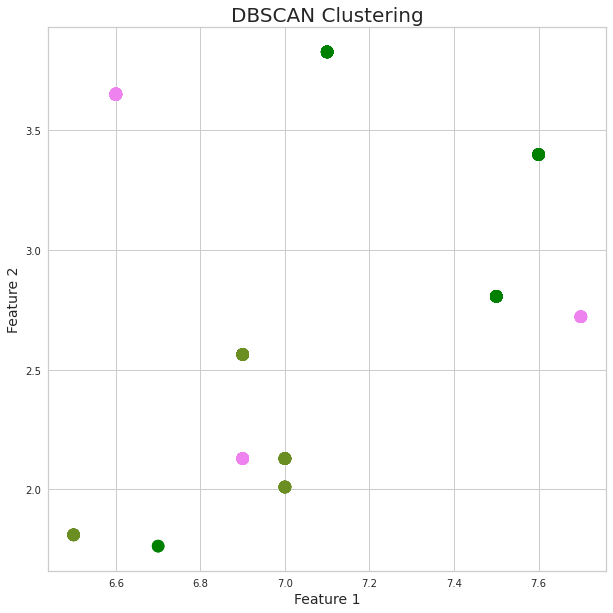

In [147]:
ddf = df_test_over.copy()
import matplotlib
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.02,min_samples=5, leaf_size=5)
dbscan.fit(ddf[['Irr. Water PH','WATER NO3_CONC(mg/L)']])
# dbscan clustering
# Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:
ddf['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(ddf['Irr. Water PH'],
            ddf['WATER NO3_CONC(mg/L)'],
            c=ddf['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=150)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

In [133]:
ddf['DBSCAN_labels'].value_counts()

 5    29
 2    19
 1    18
 8    16
 9    16
 0    13
 3    13
 4     9
 7     8
 6     7
-1     2
Name: DBSCAN_labels, dtype: int64

In [134]:
ddf.head()

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY,target,DBSCAN_labels
15,324.00,405.10,299.70,2.81,3.30,29.80,6.00,63.04,31.53,0.10,28.70,7.50,2726.00,135.00,5.00,1,30,0,0,0
24,233.30,274.40,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
24,233.30,274.40,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
22,96.70,122.90,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
19,866.30,1108.40,236.60,3.40,13.28,30.00,6.90,46.23,23.29,0.10,29.90,7.60,151.20,76.56,0.30,16,271,21,0,2


In [135]:
display(ddf.drop_duplicates())

,Fresh Veg NO3_CONC (mg/kg),Fried Veg NO3_CONC (mg/kg),Cooked Veg NO3_CONC (mg/kg),WATER NO3_CONC(mg/L),SOIL NO3_CONC(mg/L),Soil TEMP(℃),Soil PH,Soil EC(µS),Soil TDS(ppm),Soil SALINITY(%),Irr. Water TEMP(℃),Irr. Water PH,Irr. Water EC(µS),Irr. Water TDS,Irr. Water SALINITY(%),Irr. Water TSS,Irr. Water COLOUR,Irr. Water TURBIDITY,target,DBSCAN_labels
15,324.00,405.10,299.70,2.81,3.30,29.80,6.00,63.04,31.53,0.10,28.70,7.50,2726.00,135.00,5.00,1,30,0,0,0
24,233.30,274.40,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
22,96.70,122.90,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
19,866.30,1108.40,236.60,3.40,13.28,30.00,6.90,46.23,23.29,0.10,29.90,7.60,151.20,76.56,0.30,16,271,21,0,2
23,128.20,158.70,236.60,3.83,1.94,29.70,7.30,326.20,163.50,0.60,29.30,7.10,1076.00,539.50,2.00,0,9,0,0,1
13,321.80,404.50,236.60,2.81,3.30,29.80,6.00,63.04,31.53,0.10,28.70,7.50,2726.00,135.00,5.00,1,30,0,0,0
21,973.20,1216.30,236.60,3.40,13.28,29.60,6.60,39.14,19.80,0.10,29.90,7.60,151.20,76.56,0.30,16,271,21,0,2
20,652.10,802.00,236.60,3.40,13.28,30.00,6.70,59.89,29.99,0.10,29.90,7.60,151.20,76.56,0.30,16,271,21,0,2
14,442.20,539.20,236.60,2.81,3.30,29.80,6.00,63.04,31.53,0.10,28.70,7.50,2726.00,135.00,5.00,1,30,0,0,0
33,386.30,461.60,236.60,2.13,3.83,29.50,6.00,54.85,27.44,0.10,29.50,6.90,1277.00,641.90,2.40,2,16,0,1,3


In [138]:
ddf.shape, ddf.drop_duplicates().shape

((150, 20), (34, 20))

In [125]:
# distances

Text(0, 0.5, 'Epsilon')

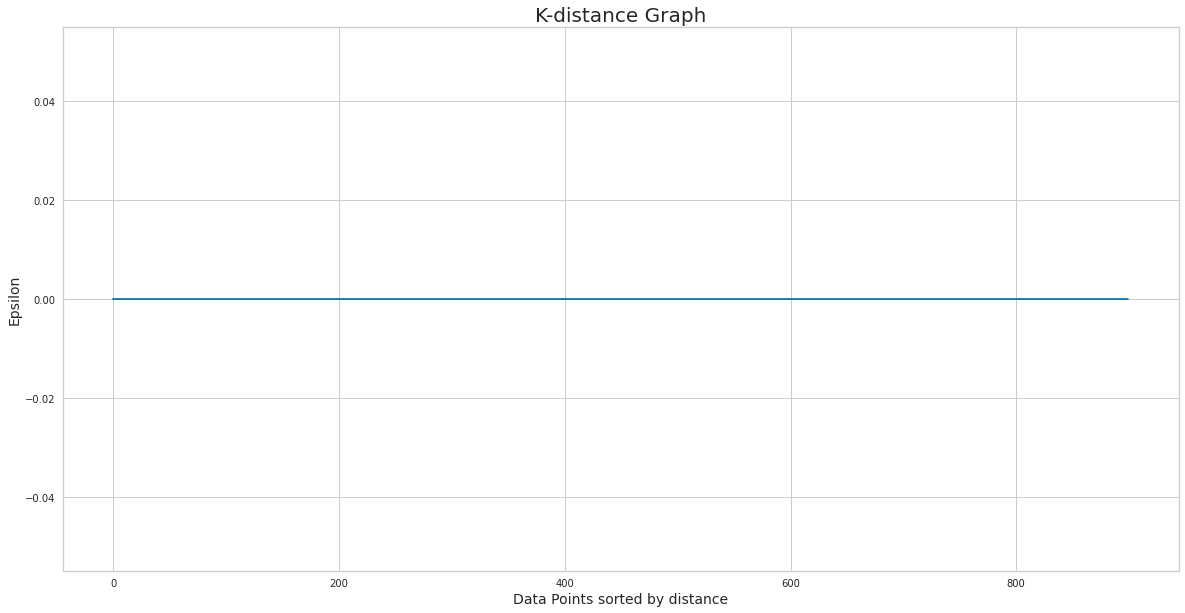

In [115]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(ddf[['Irr. Water PH','WATER NO3_CONC(mg/L)']])
distances, indices = nbrs.kneighbors(ddf[['Irr. Water PH','WATER NO3_CONC(mg/L)']])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [149]:
dbscan.labels_ 

array([ 0,  1,  1,  1,  2,  1,  0,  1,  2,  2,  1,  0,  2,  2,  2,  2,  1,
        2,  1,  0,  1,  1,  0,  0,  2,  1,  1,  2,  2,  2,  2,  2,  0,  0,
        1,  2,  2,  0,  1,  2,  1,  1,  2,  0,  2,  0,  0,  1,  0,  1,  3,
        3,  4,  5,  6,  6,  7,  3,  3,  7,  6, -1, -1,  8,  7,  4,  5,  7,
        4,  8,  3,  4,  3,  8,  3,  7,  4,  4,  4,  6,  8,  5,  6,  7,  5,
        7,  3,  6,  6,  5,  3,  3,  3,  7,  4,  5,  5,  3,  3,  4,  8,  5,
        8,  5,  9,  9,  5,  5,  8,  5,  9,  9,  5,  9,  8,  5,  8,  9,  9,
        9,  8,  9,  9,  5,  9,  8,  5,  8,  5,  5,  5,  5,  9,  8,  9,  5,
        9,  5,  8,  5,  9,  9,  8,  5,  5,  5,  5,  5,  8,  5])

In [153]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

# evaluation metrics
sc = metrics.silhouette_score(ddf, dbscan.labels_ )
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(list(y_df), dbscan.labels_)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.61
Adjusted Rand Index: 0.30


### SMOTE

In [154]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [156]:
from imblearn.over_sampling import SMOTE

In [165]:
# cdt

In [178]:
y_sm==1

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [182]:
X_sm.columns

Index(['Fresh Veg NO3_CONC (mg/kg)', 'Fried Veg NO3_CONC (mg/kg)',
       'Cooked Veg NO3_CONC (mg/kg)', 'WATER NO3_CONC(mg/L)',
       'SOIL NO3_CONC(mg/L)', 'Soil TEMP(℃)', 'Soil PH', 'Soil EC(µS)',
       'Soil TDS(ppm)', 'Soil SALINITY(%)', 'Irr. Water TEMP(℃)',
       'Irr. Water PH', 'Irr. Water EC(µS)', 'Irr. Water TDS',
       'Irr. Water SALINITY(%)', 'Irr. Water TSS', 'Irr. Water COLOUR',
       'Irr. Water TURBIDITY'],
      dtype='object')

In [183]:
X_sm['WATER NO3_CONC(mg/L)']

0    1.81
1    1.81
2    1.81
3    2.01
4    2.01
5    2.01
6    2.01
7    3.65
8    3.65
9    3.65
10   3.65
11   3.65
12   3.65
13   2.81
14   2.81
15   2.81
16   2.72
17   2.72
18   2.72
19   3.40
20   3.40
21   3.40
22   3.83
23   3.83
24   3.83
25   2.56
26   2.56
27   2.56
28   2.13
29   2.13
30   2.13
31   2.13
32   2.13
33   2.13
34   2.13
35   1.76
36   3.51
37   3.77
38   2.85
39   3.67
40   3.51
41   2.81
42   2.81
43   3.74
44   3.35
45   2.81
46   3.56
47   3.28
48   3.46
49   2.86
50   2.56
51   2.66
52   3.65
53   2.18
54   2.13
55   2.56
56   2.56
57   2.56
58   2.84
59   2.67
Name: WATER NO3_CONC(mg/L), dtype: float64

In [186]:
# X_sm

In [175]:
smote = SMOTE() #(ratio='minority')
X = ndt.drop(['target'], axis=1)
y = ndt['target'].values
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False]), 0)

Counter({1: 20, 2: 20, 0: 20})


Text(0, 0.5, 'Soil EC(µS)')

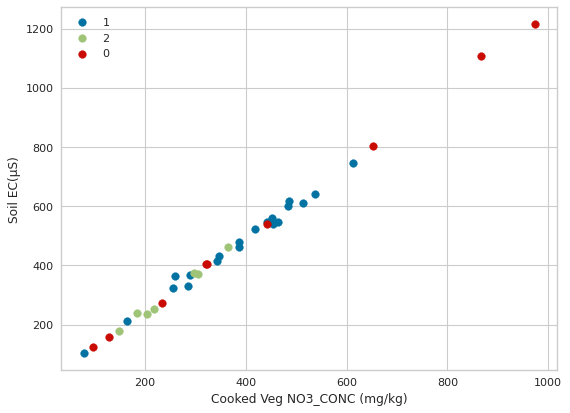

In [200]:
from collections import Counter

N=2
select_cols = random.sample(population=list(X_sm.columns), k=N)
Xe = X_sm[select_cols]


# summarize class distribution
counter = Counter(y_sm)
print(counter)

# scatter plot of examples by class label
plt.figure(figsize=(8, 6), dpi=80)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(np.array(X_sm)[row_ix, 0], np.array(X_sm)[row_ix, 1], label=str(label))
plt.legend()
plt.xlabel(r"{}".format(select_cols[0]))
plt.ylabel(r"{}".format(select_cols[1]))